In [2]:
%install '.package(url: "https://github.com/tensorflow/swift-models", .branch("master"))' Checkpoints
%install '.package(url: "https://github.com/marcrasi/DeepBeeTracking", .branch("master"))' DeepBeeTrackingDatasets DeepBeeTrackingModels
%install-location $cwd/swift-install
%install-swiftpm-flags -c release

Installing packages:
	.package(url: "https://github.com/tensorflow/swift-models", .branch("master"))
		Checkpoints
	.package(url: "https://github.com/marcrasi/DeepBeeTracking", .branch("master"))
		DeepBeeTrackingDatasets
		DeepBeeTrackingModels
With SwiftPM flags: ['-c', 'release']
Working in: /tmp/tmpzn7yyc_7/swift-install
Updating https://github.com/tensorflow/swift-models
Updating https://github.com/marcrasi/DeepBeeTracking
Updating https://github.com/google/swift-benchmark
Fetching https://github.com/apple/swift-protobuf.git
Fetching https://github.com/apple/swift-argument-parser
Cloning https://github.com/apple/swift-protobuf.git
Resolving https://github.com/apple/swift-protobuf.git at 1.10.2
Cloning https://github.com/tensorflow/swift-models
Resolving https://github.com/tensorflow/swift-models at master
Cloning https://github.com/apple/swift-argument-parser
Resolving https://github.com/apple/swift-argument-parser at 0.2.0
Cloning https://github.com/marcrasi/DeepBeeTracking
Resol

In [3]:
import Checkpoints
import DeepBeeTrackingDatasets
import DeepBeeTrackingModels
import Foundation
import PythonKit
let plt = Python.import("matplotlib.pyplot")
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [4]:
var model = UNet()
let reader = CheckpointReader(
  checkpointLocation: URL(string: "https://storage.googleapis.com/swift-tensorflow-misc-files/beetracking/bee-unet-2020-07-22.tar.gz")!,
  modelName: "bee-unet")
model.load(reader)

In [5]:
let seq2 = BeeFrames(sequenceName: "seq2")!
let seq3 = BeeFrames(sequenceName: "seq3")!
let seq6 = BeeFrames(sequenceName: "seq6")!

Loading resource: beedata
File does not exist locally at expected path: /root/.cache/swift-models/datasets/bees_v1/beedata and must be fetched
Fetching URL: https://storage.googleapis.com/swift-tensorflow-misc-files/beetracking/beedata.tar.gz...
Archive saved to: /root/.cache/swift-models/datasets/bees_v1


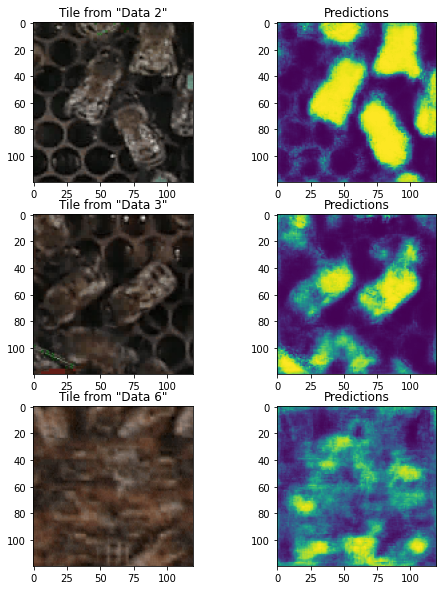

None


In [7]:
import TensorFlow
import ModelSupport

let pixels = 120
func slice(_ img: Image) -> Tensor<Float> {
  img.tensor.slice(lowerBounds: [pixels, pixels, 0], sizes: [pixels, pixels, 3])
}

let testImg0 = slice(seq2[0])
let testPreds0 = sigmoid(model(testImg0.rankLifted())).squeezingShape(at: 0, 3)

let testImg1 = slice(seq3[0])
let testPreds1 = sigmoid(model(testImg1.rankLifted())).squeezingShape(at: 0, 3)

let testImg2 = slice(seq6[0])
let testPreds2 = sigmoid(model(testImg2.rankLifted())).squeezingShape(at: 0, 3)

let axs = plt.figure(figsize: [8, 10]).subplots(3, 2)
axs[0][0].set_title("Tile from \"Data 2\"")
axs[0][0].imshow(testImg0.makeNumpyArray() / 256)
axs[0][1].set_title("Predictions")
axs[0][1].imshow(testPreds0.makeNumpyArray())

axs[1][0].set_title("Tile from \"Data 3\"")
axs[1][0].imshow(testImg1.makeNumpyArray() / 256)
axs[1][1].set_title("Predictions")
axs[1][1].imshow(testPreds1.makeNumpyArray())

axs[2][0].set_title("Tile from \"Data 6\"")
axs[2][0].imshow(testImg2.makeNumpyArray() / 256)
axs[2][1].set_title("Predictions")
axs[2][1].imshow(testPreds2.makeNumpyArray())

plt.show()